In [ ]:
!pip install pandas scikit-learn matplotlib

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, accuracy_score, matthews_corrcoef,
    roc_auc_score, f1_score, precision_score, recall_score,
    classification_report
)


#RandomForestClassifier

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_complete.xlsx")

In [ ]:
df

,ID,seq,μM,label,length,MolWeight,pI,InstabilityIndex,GRAVY,ExtCoeff,...,QSO1_G_R,QSO1_G_S,QSO1_G_T,QSO1_G_V,QSO1_G_W,QSO1_G_Y,QSO1_SC1,QSO1_G1,SOC1_SC1,SOC1_G1
0,neg_118,RGGCLCYCRRRFCVCVCR,798.6,0,18,2153.6704,9.254904,77.550000,0.300000,1490,...,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.3177,0.3177,0.2740,26957.4118
1,pos_890,IFGAIWSGIKSLF,48,1,13,1438.7106,8.750052,-10.361538,1.346154,5500,...,0.0000,0.0001,0.0000,0.0000,0.0001,0.0000,0.2703,0.2703,0.3087,11604.2500
2,pos_1178,CGLFGEIEELIEEGLENLIDWWYGYGRKKRRQRR,3.6,1,34,4213.7342,6.385827,99.632353,-1.005882,13980,...,0.0001,0.0000,0.0000,0.0000,0.0001,0.0001,0.5673,0.5673,0.3973,11257.7273
3,pos_486,AAAKAALNAVLVGANA,40,1,16,1424.6445,8.795051,-1.237500,1.193750,0,...,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.2226,0.2226,0.1909,7579.0000
4,pos_648,KWKVFKKIEKNGRNIRNGIVKAGPAIAVLGEAKAL,26.2,1,35,3818.5608,10.728974,21.814286,-0.225714,5500,...,0.0001,0.0000,0.0000,0.0001,0.0000,0.0000,0.6170,0.6170,0.4738,8883.9118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,neg_294,GLFDIWKKLRWRR,139,0,13,1774.1221,11.723012,115.130769,-0.930769,11000,...,0.0002,0.0000,0.0000,0.0000,0.0001,0.0000,0.4043,0.4043,0.5656,11429.7500
2565,pos_1096,CGLFEAIEGFIENGLEGMIDGWYGYGRKKRRQRR,0.66,1,34,4006.5314,9.108819,76.217647,-0.829412,8480,...,0.0001,0.0000,0.0000,0.0000,0.0000,0.0001,0.5799,0.5799,0.4183,11634.3030
2566,pos_1131,CGLFEAIEGFIENGWEGMIDKWYGYGRKKRRQRR,2.86,1,34,4150.7047,9.512778,73.720588,-1.070588,13980,...,0.0001,0.0000,0.0000,0.0000,0.0001,0.0001,0.5832,0.5832,0.4239,11588.2727
2567,pos_1295,FWRIVRRIWRWLR,12.5,1,13,1943.3511,11.999968,115.130769,-0.415385,16500,...,0.0006,0.0000,0.0000,0.0001,0.0004,0.0000,0.4078,0.4078,0.5737,6577.0000


In [ ]:
# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label"])  # Features
y = df['label']

In [ ]:


# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Save Predictions
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results.to_excel("predictions.xlsx", index=False)


Accuracy: 0.7879377431906615
Confusion Matrix:
 [[190  48]
 [ 61 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       238
           1       0.82      0.78      0.80       276

    accuracy                           0.79       514
   macro avg       0.79      0.79      0.79       514
weighted avg       0.79      0.79      0.79       514



#classifiers

In [ ]:

# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    F1 = f1_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'F1': round(F1, 4),
        'Precision': round(Precision, 4),
        'Recall': round(Recall, 4),
        'Time (s)': round(time_taken, 4)
    }


# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
results_df.to_excel("classification_results.xlsx", index=False)
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34576
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,F1,Precision,Recall,Time (s)
0,lightgbm,73.9496,81.5217,78.0156,0.5570,0.8738,0.7993,0.7840,0.8152,8.6573
1,rf,81.5126,77.8986,79.5720,0.5925,0.8811,0.8037,0.8301,0.7790,5.6825
2,et,77.7311,80.0725,78.9883,0.5777,0.8713,0.8036,0.8066,0.8007,5.4467
3,xgb,75.6303,83.6957,79.9611,0.5963,0.8748,0.8177,0.7993,0.8370,10.7160
4,gbc,77.7311,80.0725,78.9883,0.5777,0.8585,0.8036,0.8066,0.8007,60.8419
5,lr,74.3697,74.2754,74.3191,0.4854,0.7987,0.7565,0.7707,0.7428,6.2972
6,ada,75.2101,74.6377,74.9027,0.4974,0.7983,0.7616,0.7774,0.7464,20.7950
7,dt,67.6471,75.7246,71.9844,0.4353,0.7169,0.7438,0.7308,0.7572,1.4822
8,ridge,68.4874,66.3043,67.3152,0.3470,0.6740,0.6854,0.7093,0.6630,1.8351


In [ ]:
print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



ridge Confusion Matrix:
 [[190  48]
 [ 61 215]]


In [ ]:
import pandas as pd
import numpy as np
import shap

# SHAP values from your model
explainer = shap.Explainer(best_model, X_train, feature_names=X.columns)
shap_values = explainer(X_test, check_additivity=False)

# Mean absolute SHAP values
shap_vals = np.abs(shap_values.values).mean(axis=0)

# Create base DataFrame
df = pd.DataFrame({
    'Name': shap_values.feature_names,
    'SHAP value': shap_vals
})

# Optional: Display top individual features (already what you did)
df = df.sort_values(by='SHAP value', ascending=False).reset_index(drop=True)
df.index += 1
df.insert(0, 'No.', df.index)
df['Important rank'] = df['No.']
print(df.head(10))
df.to_excel("shap_individual_features.xlsx", index=False)

# --- Grouping by prefix ---
# Extract group name (e.g., "BTC" from "BTC_T")
df['Group'] = df['Name'].str.extract(r'^([A-Za-z]+)')

# Group by feature group and sum SHAP values
grouped = df.groupby('Group')['SHAP value'].sum().reset_index()
grouped = grouped.sort_values(by='SHAP value', ascending=False).reset_index(drop=True)
grouped.index += 1
grouped.insert(0, 'No.', grouped.index)
grouped['Important rank'] = grouped['No.']

print("\nGrouped SHAP Feature Importance:\n")
print(grouped.head(10))

# Save to Excel
grouped.to_excel("shap_grouped_features.xlsx", index=False)


    No.       Name  SHAP value  Important rank
1     1     PCP_Z1    0.415489               1
2     2      BTC_T    0.285461               2
3     3  MolWeight    0.204844               3
4     4      BTC_H    0.177304               4
5     5  QSO1_SC_L    0.168489               5
6     6      ATC_H    0.158914               6
7     7      BTC_D    0.151994               7
8     8     length    0.140897               8
9     9  PCP_SS_ST    0.137893               9
10   10      DDR_R    0.122390              10

Grouped SHAP Feature Importance:

    No.  Group  SHAP value  Important rank
1     1    PCP    1.363751               1
2     2    DPC    1.161923               2
3     3    CTC    0.783226               3
4     4    QSO    0.757940               4
5     5    BTC    0.723978               5
6     6    DDR    0.680242               6
7     7    TPC    0.617238               7
8     8    SEP    0.449321               8
9     9    ATC    0.363342               9
10   10  APAAC    

#checking

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, cohen_kappa_score
)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import time

# Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label"])
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Classifiers
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Metrics function
def calculate_metrics(y_true, y_pred, y_prob):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    Sp = TN / (TN + FP)
    Sn = TP / (TP + FN)
    FPR = FP / (FP + TN)
    Acc = accuracy_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    Precision = precision_score(y_true, y_pred)
    AUC = roc_auc_score(y_true, y_prob)
    MCC = matthews_corrcoef(y_true, y_pred)
    Kappa = cohen_kappa_score(y_true, y_pred)

    return {
        'Sensitivity': Sn,
        'Specificity': Sp,
        'FPR': FPR,
        'F1': F1,
        'Precision': Precision,
        'Accuracy': Acc,
        'AUC': AUC,
        'MCC': MCC,
        'Kappa': Kappa
    }

# Main evaluation loop
results = []

for name, model in models.items():
    print(f"Evaluating: {name}")
    start = time.time()
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validation metrics
    cv_metrics_list = []
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_val_pred
        fold_metrics = calculate_metrics(y_val, y_val_pred, y_val_prob)
        cv_metrics_list.append(fold_metrics)

    # Mean of CV metrics
    cv_metrics_avg = pd.DataFrame(cv_metrics_list).mean().to_dict()
    cv_metrics_avg = {f"CV_{k}": round(v * 100, 4) for k, v in cv_metrics_avg.items()}

    # Final training on all training data
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_test_pred
    test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)
    test_metrics = {f"Test_{k}": round(v * 100, 4) for k, v in test_metrics.items()}

    time_taken = round(time.time() - start, 4)

    # Combine results
    model_result = {'Model': name, 'Time(s)': time_taken}
    model_result.update(cv_metrics_avg)
    model_result.update(test_metrics)
    results.append(model_result)

# Save & show results
results_df = pd.DataFrame(results)
results_df.to_excel("cv_test_metrics_results.xlsx", index=False)
results_df


Evaluating: lightgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31525
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 984
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31335
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 976
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31536
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 975
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31832
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 991
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 860, number of negative: 784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31481
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523114 -> initscore=0.092523
[LightGBM] [Info] Start training from score 0.092523


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34604
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Evaluating: rf
Evaluating: et
Evaluating: xgb


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Evaluating: gbc
Evaluating: lr
Evaluating: ada
Evaluating: dt
Evaluating: ridge


,Model,Time(s),CV_Sensitivity,CV_Specificity,CV_FPR,CV_F1,CV_Precision,CV_Accuracy,CV_AUC,CV_MCC,CV_Kappa,Test_Sensitivity,Test_Specificity,Test_FPR,Test_F1,Test_Precision,Test_Accuracy,Test_AUC,Test_MCC,Test_Kappa
0,lightgbm,11.6707,80.5706,76.5050,23.4950,79.7737,79.0549,78.6375,86.6320,57.2079,57.1381,80.6691,80.4082,19.5918,81.2734,81.8868,80.5447,86.9888,61.0403,61.0329
1,rf,11.3272,77.7842,76.5018,23.4982,78.0900,78.4794,77.1776,85.9131,54.3340,54.2702,78.0669,79.5918,20.4082,79.3951,80.7692,78.7938,85.5201,57.5998,57.5644
2,et,22.2975,79.0848,75.9906,24.0094,78.7299,78.4841,77.6156,85.6026,55.1909,55.1010,76.2082,79.1837,20.8163,78.0952,80.0781,77.6265,84.7439,55.3319,55.2610
3,xgb,37.3763,79.2722,76.0963,23.9037,78.8629,78.4865,77.7616,86.1122,55.4267,55.3998,79.9257,81.6327,18.3673,81.2854,82.6923,80.7393,87.5457,61.4954,61.4576
4,gbc,216.6554,78.0612,76.4024,23.5976,78.2039,78.4243,77.2749,84.5687,54.5238,54.4618,77.6952,78.7755,21.2245,78.8679,80.0766,78.2101,84.5558,56.4159,56.3885
5,lr,18.4655,74.0672,71.0952,28.9048,73.9196,73.7909,72.6521,79.4031,45.1853,45.1729,73.2342,69.7959,30.2041,72.9630,72.6937,71.5953,78.2186,43.0471,43.0458
6,ada,65.6449,74.4393,68.8472,31.1528,73.4152,72.4488,71.7762,78.1781,43.3861,43.3464,69.5167,66.9388,33.0612,69.6462,69.7761,68.2879,76.1892,36.4491,36.4489
7,dt,5.2068,72.0237,71.1978,28.8022,72.6682,73.3296,71.6302,71.6107,43.1936,43.1828,72.1190,71.0204,28.9796,72.6592,73.2075,71.5953,71.5697,43.1132,43.1080
8,ridge,5.8474,65.6107,63.2282,36.7718,65.8960,66.2324,64.4769,64.4194,28.8511,28.8279,69.1450,64.8980,35.1020,68.7616,68.3824,67.1206,67.0215,34.0639,34.0615


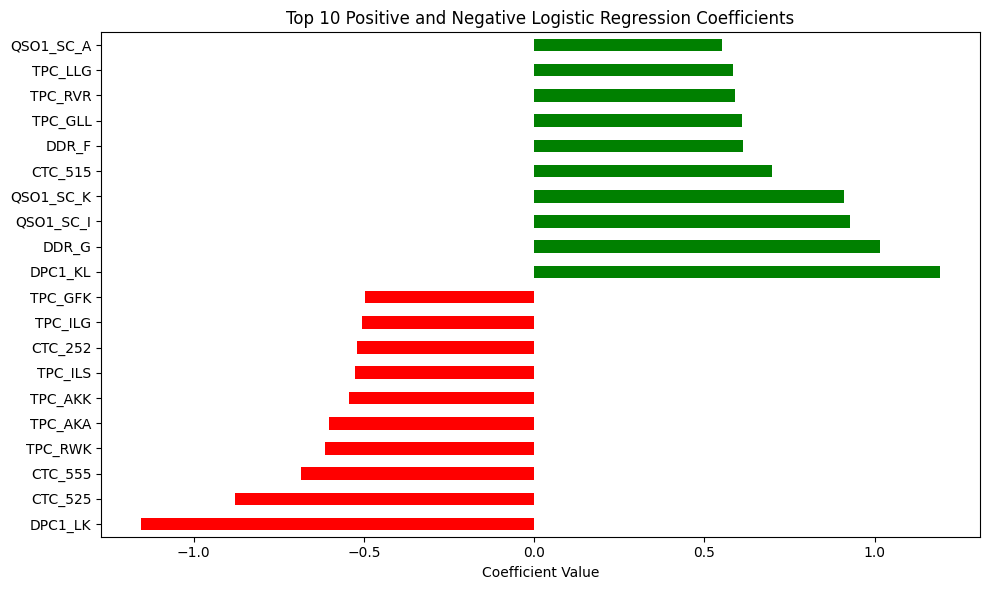

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Prepare Data
X = df.drop(columns=["ID", "seq", "μM", "label"])
y = df["label"]

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Step 5: Get Coefficients
feature_names = X.columns
coefficients = pd.Series(lr.coef_[0], index=feature_names)

# Step 6: Get Top +10 and -10 Influential Features
top_positive = coefficients.sort_values(ascending=False).head(10)
top_negative = coefficients.sort_values().head(10)

# Combine for plotting
top_features = pd.concat([top_negative, top_positive])

# Step 7: Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color=np.where(top_features > 0, 'green', 'red'))
plt.title("Top 10 Positive and Negative Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


#5-fold

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34633
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34722
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34626
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34501
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34345
[LightGBM] [Info] Number of data points in the train set: 2056, number of used features: 1106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523346 -> initscore=0.093453
[LightGBM] [Info] Start training from score 0.093453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


lightgbm: Mean Accuracy = 0.7867 (+/- 0.0145)
rf: Mean Accuracy = 0.7906 (+/- 0.0144)
et: Mean Accuracy = 0.7910 (+/- 0.0106)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:43:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:44:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:44:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

xgb: Mean Accuracy = 0.7914 (+/- 0.0122)
gbc: Mean Accuracy = 0.7847 (+/- 0.0068)
lr: Mean Accuracy = 0.7334 (+/- 0.0137)
ada: Mean Accuracy = 0.7248 (+/- 0.0162)
dt: Mean Accuracy = 0.7182 (+/- 0.0113)
ridge: Mean Accuracy = 0.6279 (+/- 0.0213)


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    metrics_list = []
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
        Sp = TN / (TN + FP) * 100
        Sn = TP / (TP + FN) * 100
        Acc = accuracy_score(y_test, y_pred) * 100
        MCC = matthews_corrcoef(y_test, y_pred)
        AUC = roc_auc_score(y_test, y_prob)

        metrics_list.append([Sp, Sn, Acc, MCC, AUC])

    # Average metrics over 5 folds
    metrics_mean = np.mean(metrics_list, axis=0)
    results.append({
        'Model': name,
        'Sp (%)': round(metrics_mean[0], 4),
        'Sn (%)': round(metrics_mean[1], 4),
        'Acc (%)': round(metrics_mean[2], 4),
        'MCC': round(metrics_mean[3], 4),
        'AUC': round(metrics_mean[4], 4)
    })

results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34633
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34722
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34626
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34501
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1076, number of negative: 980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34345
[LightGBM] [Info] Number of data points in the train set: 2056, number of used features: 1106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523346 -> initscore=0.093453
[LightGBM] [Info] Start training from score 0.093453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warning

      Model   Sp (%)   Sn (%)  Acc (%)     MCC     AUC
0  lightgbm  76.8786  80.2974  78.6694  0.5726  0.8699
1        rf  78.4306  78.9591  78.7075  0.5736  0.8657
2        et  76.9609  77.9182  77.4616  0.5487  0.8583
3       xgb  77.2867  80.8178  79.1362  0.5822  0.8689
4       gbc  77.4496  79.5539  78.5518  0.5705  0.8526
5        lr  71.7344  74.7955  73.3361  0.4656  0.7960
6       ada  72.7160  72.2677  72.4807  0.4495  0.7940
7        dt  70.1790  74.3494  72.3621  0.4457  0.7226
8     ridge  60.8705  64.5353  62.7873  0.2552  0.6270


##hemo+AAC

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_with_AAC.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label", "length"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:55:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,Time (s)
0,lightgbm,77.7311,75.0000,76.2646,0.5259,0.8539,0.1388
1,rf,76.8908,75.0000,75.8755,0.5176,0.8350,0.4730
2,et,73.9496,76.4493,75.2918,0.5036,0.8195,0.3472
3,xgb,76.0504,76.0870,76.0700,0.5203,0.8412,0.1881
4,gbc,72.6891,73.1884,72.9572,0.4579,0.8066,0.5141
5,lr,63.8655,65.9420,64.9805,0.2975,0.7129,0.0062
6,ada,73.9496,67.0290,70.2335,0.4090,0.7673,0.2236
7,dt,70.5882,68.8406,69.6498,0.3932,0.7096,0.0178
8,ridge,64.7059,65.5797,65.1751,0.3022,0.6514,0.0082


#hemo+DPC

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_with_DPC.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label", "length"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4639
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 280
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,Time (s)
0,lightgbm,71.4286,78.2609,75.0973,0.4983,0.8263,0.3542
1,rf,73.9496,75.7246,74.9027,0.4961,0.8384,1.1691
2,et,71.0084,75.7246,73.5409,0.4676,0.8295,1.8788
3,xgb,73.9496,77.5362,75.8755,0.5149,0.8341,1.2527
4,gbc,74.7899,68.4783,71.4008,0.4317,0.8013,2.7656
5,lr,67.2269,68.4783,67.8988,0.3563,0.7287,0.1515
6,ada,69.3277,63.7681,66.3424,0.3302,0.7270,0.9560
7,dt,68.9076,71.3768,70.2335,0.4023,0.7009,0.2174
8,ridge,68.0672,69.5652,68.8716,0.3756,0.6882,0.0780


#hemo+PCP

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_with_PCP.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label", "length"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,Time (s)
0,lightgbm,73.9496,76.4493,75.2918,0.5036,0.8227,0.2586
1,rf,73.9496,75.0000,74.5136,0.4887,0.8266,0.7612
2,et,71.8487,75.0000,73.5409,0.4682,0.8064,0.3835
3,xgb,71.0084,74.6377,72.9572,0.4563,0.8167,0.3825
4,gbc,70.1681,69.9275,70.0389,0.4000,0.7860,1.2672
5,lr,64.7059,65.5797,65.1751,0.3022,0.7136,0.0239
6,ada,62.6050,68.1159,65.5642,0.3073,0.7195,0.3674
7,dt,67.2269,67.7536,67.5097,0.3490,0.6899,0.0450
8,ridge,64.7059,65.5797,65.1751,0.3022,0.6514,0.0035


##hemo+AAC+DPC

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_with_AAC+DPC.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label", "length"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5954
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,Time (s)
0,lightgbm,75.2101,79.3478,77.4319,0.5459,0.8507,0.3935
1,rf,78.5714,75.3623,76.8482,0.5379,0.8462,0.7645
2,et,75.6303,75.7246,75.6809,0.5125,0.8457,0.8930
3,xgb,74.7899,80.0725,77.6265,0.5495,0.8500,0.5655
4,gbc,74.7899,67.7536,71.0117,0.4246,0.8014,2.2699
5,lr,69.3277,68.1159,68.6770,0.3735,0.7294,0.0992
6,ada,64.2857,70.6522,67.7043,0.3498,0.7515,0.6963
7,dt,67.6471,71.3768,69.6498,0.3900,0.6963,0.1158
8,ridge,68.4874,68.1159,68.2879,0.3651,0.6830,0.0361


##hemo+AAC+DPC+PCP

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_with_AAC+DPC+PCP.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label", "length"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10120
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 330
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,Time (s)
0,lightgbm,73.9496,75.7246,74.9027,0.4961,0.8434,0.6233
1,rf,76.4706,73.9130,75.0973,0.5025,0.8526,0.8768
2,et,76.0504,77.1739,76.6537,0.5315,0.8450,0.8196
3,xgb,74.7899,75.7246,75.2918,0.5043,0.8483,0.8850
4,gbc,73.1092,73.5507,73.3463,0.4657,0.8205,4.2975
5,lr,69.7479,67.3913,68.4825,0.3704,0.7290,0.1627
6,ada,67.2269,66.6667,66.9261,0.3381,0.7379,0.9080
7,dt,65.9664,73.1884,69.8444,0.3925,0.6958,0.1611
8,ridge,68.9076,68.1159,68.4825,0.3693,0.6851,0.0407


#ProtParam ProteinAnalysis

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_with_properties.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1069, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520195 -> initscore=0.080823
[LightGBM] [Info] Start training from score 0.080823


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Sp (%),Sn (%),Acc (%),MCC,AUC,Time (s)
0,lightgbm,73.1092,76.8116,75.0973,0.4992,0.8389,0.1708
1,rf,75.6303,74.2754,74.9027,0.4978,0.8496,0.8155
2,et,77.7311,77.1739,77.4319,0.5479,0.8368,0.5600
3,xgb,70.5882,76.4493,73.7354,0.4711,0.8193,0.9099
4,gbc,73.1092,73.5507,73.3463,0.4657,0.8221,0.8861
5,lr,71.8487,72.8261,72.3735,0.4459,0.7863,0.0129
6,ada,65.5462,73.1884,69.6498,0.3884,0.7467,0.2425
7,dt,65.5462,68.4783,67.1206,0.3398,0.6718,0.0177
8,ridge,72.2689,72.4638,72.3735,0.4464,0.7237,0.0145


#expect soc

In [ ]:
# Step 1: Load Data
df = pd.read_excel("hemo_data_exp_soc.xlsx")


# Step 2: Preprocessing
X = df.drop(columns=["ID", "seq", "μM", "label", "length"])  # Features
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'Time (s)': round(time_taken, 4)
    }

# Step 6: Run and Collect Results
results = []
for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(metrics)

# Step 7: Save and View Results
results_df = pd.DataFrame(results)
#results_df.to_excel("classification_results.xlsx", index=False)
results_df


#correlation

In [ ]:
import pandas as pd


# Drop irrelevant columns
X = df.drop(columns=["ID", "seq", "μM","label"])
y = df['label']

# Correlation of each feature with the label
correlation_with_label = X.corrwith(y)

# Sort by absolute correlation
correlation_with_label = correlation_with_label.abs().sort_values(ascending=False)

# Save top 100 correlated features
top_features = correlation_with_label.head(100)
top_features.to_excel("top_100_feature_label_correlations.xlsx")


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


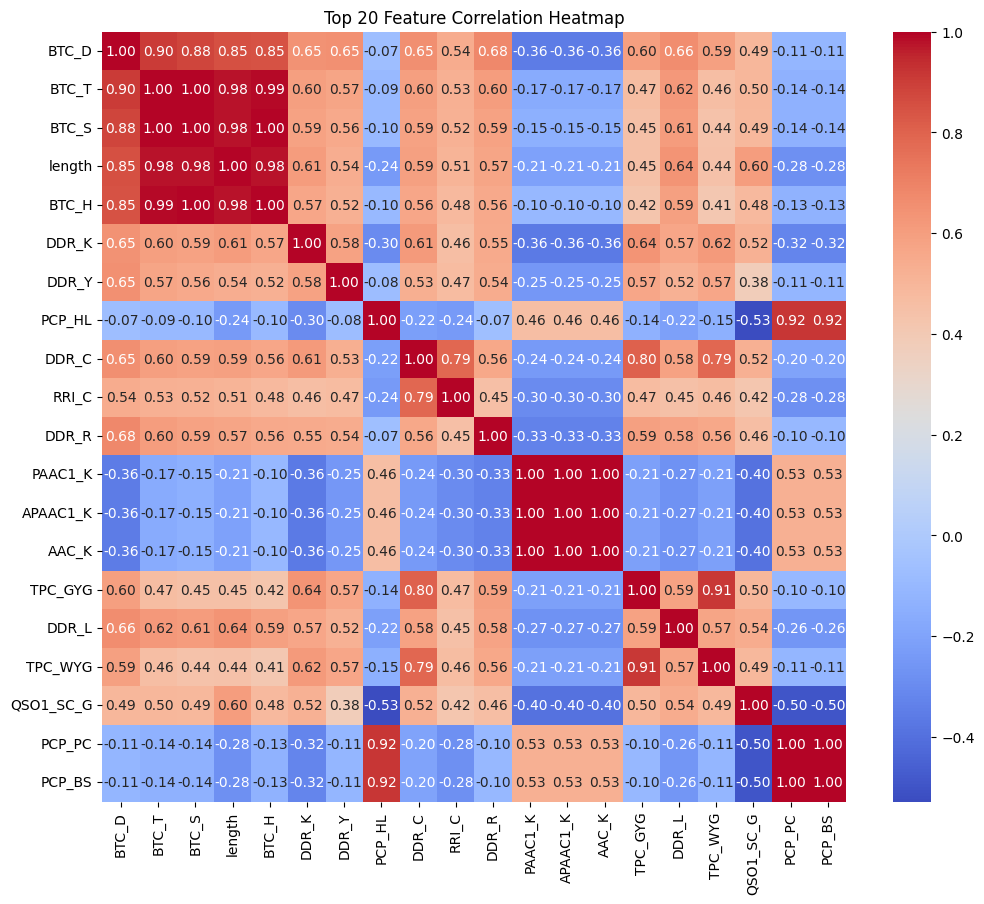

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 20 features
top20 = correlation_with_label.head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(X[top20].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top 20 Feature Correlation Heatmap")
plt.show()


In [ ]:
# Assuming logistic regression has already been trained
lr_model = models['lr']
lr_model.fit(X_train, y_train)

# Get feature names (after dropping unwanted columns)
feature_names = X.columns  # X is original unscaled dataframe

# Get coefficients
coefficients = lr_model.coef_[0]  # For binary classification, shape is (1, n_features)

# Create a DataFrame for easy interpretation
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add interpretation
coef_df['Effect'] = coef_df['Coefficient'].apply(
    lambda x: '↑ Positive Class' if x > 0.5 else ('↓ Positive Class' if x < -0.5 else 'Weak')
)

# Sort by absolute effect
coef_df['Abs'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs', ascending=False).drop(columns='Abs')

# Show top coefficients
print(coef_df.head(10))


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
    precision_score, recall_score, confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:

# Step 2: Load and Preprocess Data
df = pd.read_excel("hemo_data_complete.xlsx")  # Replace with your file



In [ ]:
# Features and labels
X = df.drop(columns=["ID", "seq", "μM", "label"])
y = df["label"]

In [ ]:
def evaluate_on_data(name, model, X, y, dataset='Test'):
    start = time.time()
    model.fit(X_train, y_train)  # always fit on training set
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    ENS = (Sn + Sp) / 2
    Acc = accuracy_score(y, y_pred) * 100
    MCC = matthews_corrcoef(y, y_pred)
    AUC = roc_auc_score(y, y_prob)
    F1 = f1_score(y, y_pred)
    Precision = precision_score(y, y_pred)
    Recall = recall_score(y, y_pred)

    return {
        'Model': name,
        'Dataset': dataset,
        'ENS (%)': round(ENS, 4),
        'Spec (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'AUC': round(AUC, 4),
        'MCC': round(MCC, 4),
        'F1': round(F1, 4),
        'Precision': round(Precision, 4),
        'Recall': round(Recall, 4),
        'Time (s)': round(end - start, 4)
    }


In [ ]:


# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Define Models
models = {
    'lightgbm': LGBMClassifier(),
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(max_iter=1000),
    'ada': AdaBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'ridge': RidgeClassifier()
}

# Step 5: Cross-Validation on Training Set
cv_results = []
cv_folds = 5
for name, model in models.items():
    start = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42),
                              scoring='roc_auc')
    end = time.time()
    avg_auc = np.mean(scores)
    cv_results.append({
        'Model': name,
        'CV AUC (mean)': round(avg_auc, 4),
        'CV Time (s)': round(end - start, 4)

    })

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.to_excel("cv_training_results.xlsx", index=False)

# Step 6: Final Evaluation on Test Set
def final_test_evaluation(name, model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    end = time.time()

    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    Sp = TN / (TN + FP) * 100
    Sn = TP / (TP + FN) * 100
    Acc = accuracy_score(y_test, y_pred) * 100
    MCC = matthews_corrcoef(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_prob)
    F1 = f1_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    time_taken = end - start

    return {
        'Model': name,
        'Sp (%)': round(Sp, 4),
        'Sn (%)': round(Sn, 4),
        'Acc (%)': round(Acc, 4),
        'MCC': round(MCC, 4),
        'AUC': round(AUC, 4),
        'F1': round(F1, 4),
        'Precision': round(Precision, 4),
        'Recall': round(Recall, 4),
        'Test Time (s)': round(time_taken, 4)
    }

# Step 7: Evaluate All Models on Test Set
test_results = []
for name, model in models.items():
    metrics = final_test_evaluation(name, model, X_train, y_train, X_test, y_test)
    test_results.append(metrics)

test_results_df = pd.DataFrame(test_results)
test_results_df.to_excel("final_test_results.xlsx", index=False)

# Step 8: Display Results
print("=== Cross-Validation Results on Training Set ===")
print(cv_results_df)

print("\n=== Final Evaluation on Test Set ===")
print(test_results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31525
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 984
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31335
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 976
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31536
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 975
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 861, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31832
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 991
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523723 -> initscore=0.094962
[LightGBM] [Info] Start training from score 0.094962


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 860, number of negative: 784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31481
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523114 -> initscore=0.092523
[LightGBM] [Info] Start training from score 0.092523


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not

[LightGBM] [Info] Number of positive: 1076, number of negative: 979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34604
[LightGBM] [Info] Number of data points in the train set: 2055, number of used features: 1107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523601 -> initscore=0.094474
[LightGBM] [Info] Start training from score 0.094474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:40:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Cross-Validation Results on Training Set ===
      Model  CV AUC (mean)  CV Time (s)
0  lightgbm         0.8663      13.4142
1        rf         0.8623      10.9961
2        et         0.8551      21.1832
3       xgb         0.8611      40.9705
4       gbc         0.8447     216.1953
5        lr         0.7940      19.2144
6       ada         0.7818      66.2730
7        dt         0.7158       5.5651
8     ridge         0.6629       6.3511

=== Final Evaluation on Test Set ===
      Model   Sp (%)   Sn (%)  Acc (%)     MCC     AUC      F1  Precision  \
0  lightgbm  80.4082  80.6691  80.5447  0.6104  0.8699  0.8127     0.8189   
1        rf  77.5510  76.5799  77.0428  0.5408  0.8557  0.7774     0.7893   
2        et  78.3673  77.6952  78.0156  0.5601  0.8496  0.7872     0.7977   
3       xgb  81.6327  79.9257  80.7393  0.6150  0.8755  0.8129     0.8269   
4       gbc  79.1837  77.6952  78.4047  0.5682  0.8472  0.7902     0.8038   
5        lr  69.7959  73.2342  71.5953  0.4305  0.7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_auc_score, matthews_corrcoef, f1_score,
                             accuracy_score, recall_score, precision_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Model dictionary with regularization and depth control
models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000),
    'Ridge': RidgeClassifier(alpha=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_leaf=4, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=200, max_depth=6, min_samples_leaf=4, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05,
                             subsample=0.8, colsample_bytree=0.8, reg_alpha=1, reg_lambda=1,
                             use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=300, max_depth=6, learning_rate=0.05,
                               subsample=0.8, colsample_bytree=0.8, reg_alpha=1, reg_lambda=1,
                               random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)
}

def evaluate_model(model, name):
    # Check for early stopping capability
    if name in ['XGBoost', 'LightGBM']:
        if name == 'XGBoost':
            model.fit(
                X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                early_stopping_rounds=20,
                verbose=False
            )
        elif name == 'LightGBM':
            model.fit(
                X_train, y_train,
                eval_set=[(X_test, y_test)],
                early_stopping_rounds=20,
                verbose=False
            )
    else:
        model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_prob_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else y_pred_train
    y_prob_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred_test

    train_metrics = {
        'AUC': roc_auc_score(y_train, y_prob_train),
        'MCC': matthews_corrcoef(y_train, y_pred_train),
        'F1': f1_score(y_train, y_pred_train),
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Recall': recall_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train)
    }

    test_metrics = {
        'AUC': roc_auc_score(y_test, y_prob_test),
        'MCC': matthews_corrcoef(y_test, y_pred_test),
        'F1': f1_score(y_test, y_pred_test),
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test)
    }

print(f"\nModel: {name}")
print("Train Metrics:", {k: round(v, 4) for k, v in train_metrics.items()})
print("Test  Metrics:", {k: round(v, 4) for k, v in test_metrics.items()})
print("Overfit AUC Gap:", round(train_metrics['AUC'] - test_metrics['AUC'], 4))

    # Cross-validation AUC
cv_auc = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(5), scoring="roc_auc").mean()
print(f"Cross-Validation AUC (train set): {round(cv_auc, 4)}")

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, name)


Model: XGBoost


TypeError: type str doesn't define __round__ method